<a href="https://colab.research.google.com/github/Jordan-mackey/INFO_5502_LABS/blob/main/INFO_5502_Final_Exam_Summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):



In [42]:
#### You code here

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# clone github repo
!git clone https://github.com/unt-iialab/info5502-spring2022.git

fatal: destination path 'info5502-spring2022' already exists and is not an empty directory.


In [54]:
# import dataset
births_df = pd.read_csv('/content/info5502-spring2022/datasets/births.csv')
births_df.head(20)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


In [55]:
# explore data types
births_df.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [56]:
births_df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [57]:
# drop na values since dates cannot be guessed
births_df = births_df.dropna()
births_df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [58]:
# convert floats to int for 'day' column
births_df['day'] = births_df['day'].astype('int')
births_df.dtypes

year       int64
month      int64
day        int64
gender    object
births     int64
dtype: object

In [59]:
births_df.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [60]:
# make sure no days over 31
births_df_2 = births_df[births_df['day'] <= 28]
births_df_2.describe()

,year,month,day,births
count,13440.000000,13440.000000,13440.000000,13440.000000
mean,1978.500000,6.500000,14.500000,4822.421577
std,5.766496,3.452181,8.078048,578.648577
min,1969.000000,1.000000,1.000000,3273.000000
25%,1973.750000,3.750000,7.750000,4382.000000
50%,1978.500000,6.500000,14.500000,4812.000000
75%,1983.250000,9.250000,21.250000,5256.000000
max,1988.000000,12.000000,28.000000,6527.000000


In [61]:
# concatenate year, month, day into one date column

# new_births = births_df_2.drop(births_df_2[(births_df_2['month'] == 2) & (births_df_2['day'] >= 29)])
# births_df_2 = births_df_2.drop('year', axis = 1)

# ***realistically, I know that it is not feasible to drop every row that has a date over day 28. I know I need to just replace the  >28 values with 28, but I can't get it to work and I'm going to run
# ***out of time

births_df_2['date'] = pd.to_datetime(births_df_2[["year","month", "day"]])
births_df_2.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,year,month,day,gender,births,date
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03


In [65]:
# isolate df into only one year to match figure in instructions
births_1969 = births_df_2[births_df_2['year'] == 1969]
births_1969.head()


,year,month,day,gender,births,date
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03


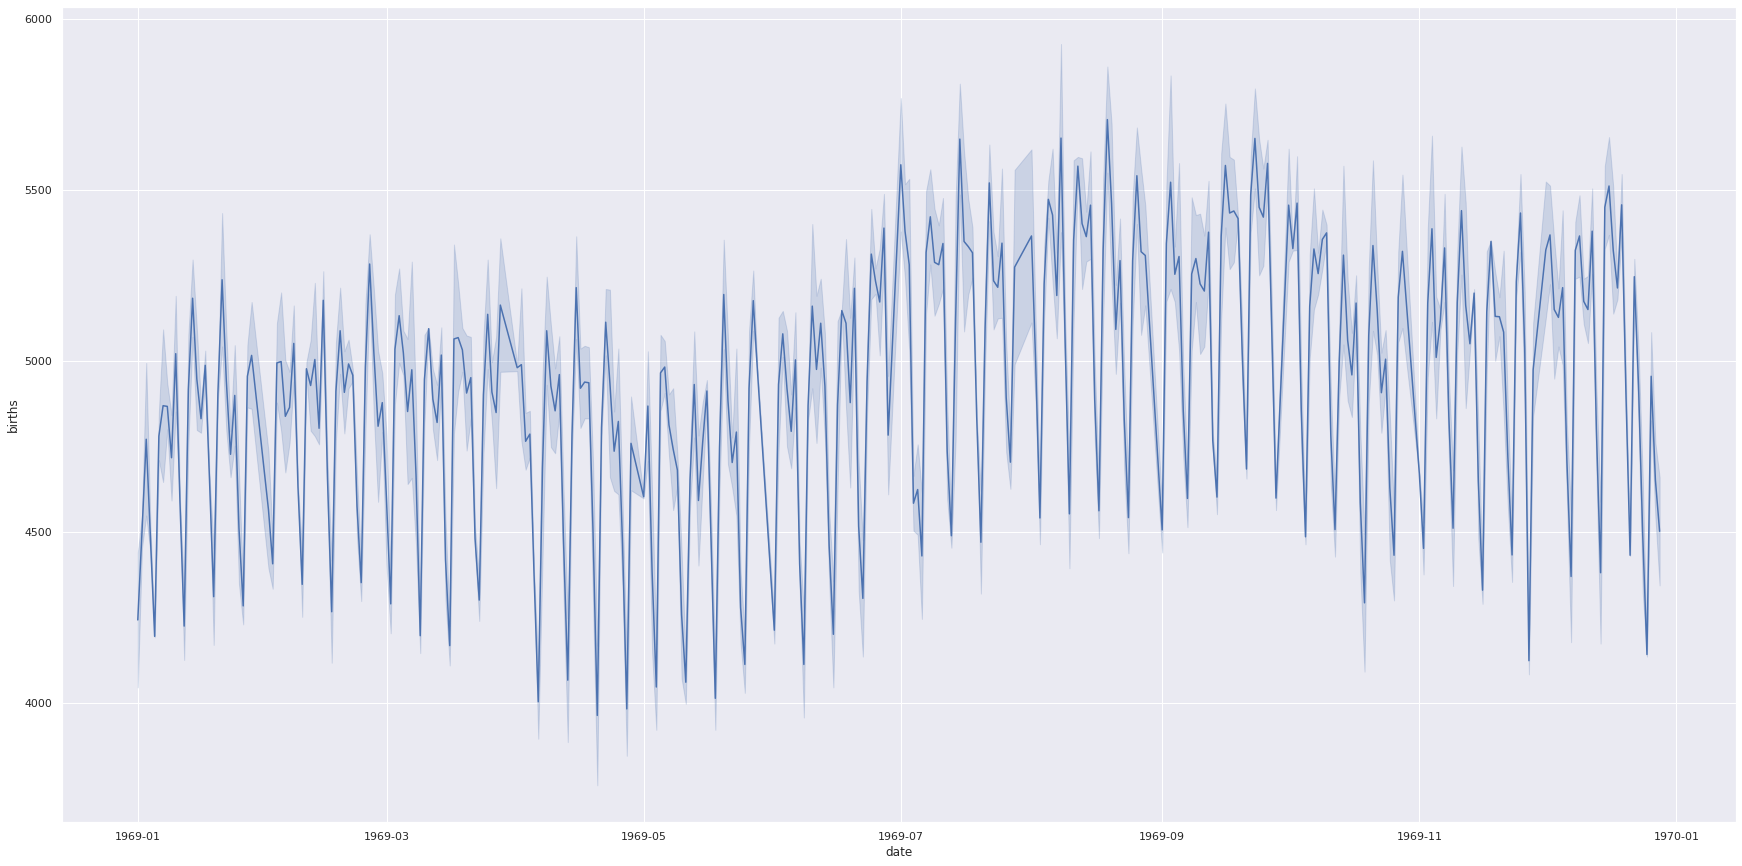

In [71]:
# create lineplot
# sns.set(rc={'figure.figsize':(14.7,8.27)})
# sns.lineplot(x = 'date', y = 'births', data = births_1969)
# plt.show()

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [50, 15]
ax = sns.lineplot(x = 'date', y = 'births', data = births_1969)
# I would have then chosen to add the labels to the specific dates included in the instructions, but I am running out of time

plt.show()

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 



In [82]:
#### You code here
tp_0 = 157
tp_1 = 151
tp_2 = 135
tp_3 = 70
tp_4 = 56
tp_5 = 16

total = 157+46+25+22+15+3+28+151+45+18+1+6+11+38+135+14+3+7+11+15+18+70+6+4+14+12+14+7+56+2+12+7+6+5+5+16

negatives = total - total_tp

total_tp = (tp_0+tp_1+tp_2+tp_3+tp_4+tp_5)
print(total_tp)
print(total)
print(negatives)

accuracy = total_tp/total

recall = total_tp/(total_tp+



268
585
1005
420


<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [72]:
#### You code here
### (1)(30 points) Attached are the Normal and Intrusion data folders. 
## Read in the data and store them in two separate dataframes. 
### Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string.
intrusion = pd.read_csv('/content/info5502-spring2022/finalexam/q4/inetd-intrusion.int')
normal = pd.read_csv('/content/info5502-spring2022/finalexam/q4/inetd-normal.int')



In [73]:
intrusion.head()

,167 90
0,167 125
1,167 125
2,167 106
3,167 5
4,167 90


In [74]:
normal.head()

,167 90
0,167 125
1,167 125
2,167 106
3,167 5
4,167 90


<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [92]:
#### You code and your answer here here
reviews = pd.read_csv('/content/info5502-spring2022/finalexam/Software_Reviews_csv_files_S.csv')
reviews.head()





,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,...,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,...,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04


In [93]:
### (1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. 
### So, there are extra title rows in the middle of the file, which they need to be removed.)

reviews = reviews.drop('title', axis = 1)
reviews.head()


,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,is_rating,score,created,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,FALSE,4.462893,8/25/2015,...,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,FALSE,4.462893,6/22/2018,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,FALSE,4.462893,12/20/2017,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,FALSE,4.462893,4/4/2018,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,FALSE,4.462893,8/26/2015,...,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04


In [94]:
### (2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.
reviews = reviews.dropna()

In [95]:
reviews.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,is_rating,score,created,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,FALSE,4.462893,6/22/2018,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1711777.000
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,FALSE,4.462893,12/20/2017,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1122507.333
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,FALSE,4.462893,4/4/2018,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1413648.333
10,10.0,10,1301781,Published,SoftwareAdvice___437237,f1a6a9cfb4,90666,FALSE,4.462893,6/27/2018,...,FALSE,Eduardo D.,Telecommunications,daily,2+ years,SoftwareAdvice,NoIncentive,0.792923093,0.957252979,1735704.667
14,14.0,14,761397,Published,SoftwareAdvice___313796,390a7f4c1b,90666,FALSE,4.462893,10/24/2017,...,FALSE,marcus y.,Computer Software,daily,2+ years,SoftwareAdvice,NoIncentive,0.99984467,0.976857305,1015191.333


In [96]:
reviews_final = reviews[reviews['incentivized'] != 'None']

In [98]:
reviews_final.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,is_rating,score,created,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,FALSE,4.462893,6/22/2018,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1711777.000
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,FALSE,4.462893,12/20/2017,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1122507.333
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,FALSE,4.462893,4/4/2018,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1413648.333
10,10.0,10,1301781,Published,SoftwareAdvice___437237,f1a6a9cfb4,90666,FALSE,4.462893,6/27/2018,...,FALSE,Eduardo D.,Telecommunications,daily,2+ years,SoftwareAdvice,NoIncentive,0.792923093,0.957252979,1735704.667
14,14.0,14,761397,Published,SoftwareAdvice___313796,390a7f4c1b,90666,FALSE,4.462893,10/24/2017,...,FALSE,marcus y.,Computer Software,daily,2+ years,SoftwareAdvice,NoIncentive,0.99984467,0.976857305,1015191.333


In [102]:
# Group A
group_a = reviews_final[(reviews_final['incentivized'] == 'NominalGift')|(reviews_final['incentivized'] == 'VendorReferredIncentivized')]
group_a.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,is_rating,score,created,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,FALSE,4.462893,6/22/2018,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1711777.000
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,FALSE,4.462893,12/20/2017,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1122507.333
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,FALSE,4.462893,4/4/2018,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1413648.333
17,17.0,17,846217,Published,SoftwareAdvice___341241,ec69ec93a9,90666,FALSE,4.462893,12/22/2017,...,FALSE,Sabrina B.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.999515414,0.999205172,1128283.667
20,20.0,20,1300111,Published,SoftwareAdvice___436897,695de7bb9f,90666,FALSE,4.462893,6/27/2018,...,FALSE,Jose R.,Management Consulting,daily,Less than 6 months,SoftwareAdvice,NominalGift,0.997060239,0.984327018,1733474.667


In [103]:
# Group B
group_b = reviews_final[(reviews_final['incentivized'] == 'NoIncentive') | (reviews_final['incentivized'] == 'NonNominalGift') | (reviews_final['incentivized'] == 'VendorReferred')]
group_b.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,is_rating,score,created,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
10,10.0,10,1301781,Published,SoftwareAdvice___437237,f1a6a9cfb4,90666,FALSE,4.462893,6/27/2018,...,FALSE,Eduardo D.,Telecommunications,daily,2+ years,SoftwareAdvice,NoIncentive,0.792923093,0.957252979,1735704.667
14,14.0,14,761397,Published,SoftwareAdvice___313796,390a7f4c1b,90666,FALSE,4.462893,10/24/2017,...,FALSE,marcus y.,Computer Software,daily,2+ years,SoftwareAdvice,NoIncentive,0.99984467,0.976857305,1015191.333
16,16.0,16,1301447,Published,SoftwareAdvice___437193,a80426575d,90666,FALSE,4.462893,6/27/2018,...,FALSE,Rickus W.,Computer Software,daily,2+ years,SoftwareAdvice,NoIncentive,0.999574721,0.971120834,1735257.333
19,19.0,19,766563,Published,SoftwareAdvice___315016,53a9d03c78,90666,FALSE,4.462893,10/27/2017,...,FALSE,Terry C.,Computer Software,daily,6-12 months,SoftwareAdvice,NoIncentive,0.995381117,0.755809307,1022077.667
29,29.0,29,1322601,Published,SoftwareAdvice___440469,98e3c3a97b,90666,FALSE,4.462893,7/4/2018,...,FALSE,Gilbert A.,Insurance,daily,Less than 6 months,SoftwareAdvice,NoIncentive,0.844004273,0.988325715,1763458.333


In [138]:
from scipy import stats
group_a['OverAllRating'] = group_a['OverAllRating'].astype('int')
group_b['OverAllRating'] = group_b['OverAllRating'].astype('int')
stats.ttest_ind(group_a['OverAllRating'], group_b['OverAllRating'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Ttest_indResult(statistic=-3.4400841530091344, pvalue=0.0005929614922537031)

In [139]:
group_a['OverAllRating'].mean()

4.364050056882822

In [140]:
group_b['OverAllRating'].mean()

4.502890173410405

In [ ]:
# based on the t-test, the average OverAllRatings are not equal, and the rating for group b with no incentive was higher. we can conclude this based on the fact that the p value returned from the test was 0.0006. p < 0.05, therefore we 
# can reject the Ho.